In [17]:
#Import modules
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [18]:
#load dataset
df1 = pd.read_csv('bengaluru_house_prices.csv')
df1.head()


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [19]:
#check line of table
df1.shape

(13320, 9)

In [20]:
# Check columns does it contain?
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [22]:
#filter columns have area_types has values unique
df1['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [23]:
#filter area_type and Counts values
df1['area_type'].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [10]:
#Drop Tables doesnt use in build model
df2 = df1.drop(['area_type', 'society', 'balcony', 'availability'], axis='columns')
df2.shape

(13320, 5)

                                        Data Cleaning: Cleaning Data NaN:VALUES


In [34]:
df2.shape

(13320, 5)

In [12]:
#filter null values and sum of values
print("Null values before cleaning:")
print(df2.isnull().sum())


Null values before cleaning:
location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64


In [14]:
# Fill null values with 0
df2.fillna(0, inplace=True)

# Verify that null values have been filled
print("\nNull values after filling:")
print(df2.isnull().sum())


Null values after filling:
location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64


                            Feature Engineering

In [ ]:
Add new feature(integer) for bhk (Berooms Hall kitchen)

In [45]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [43]:
df3['bhk']= df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.bhk.unique()

C:\Users\Admin\AppData\Local\Temp\ipykernel_34556\1236678463.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']= df3['size'].apply(lambda x: int(x.split(' ')[0]))


array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [ ]:
           # Explore total_sqft feature

In [54]:
def is_float(x):
    try:
        float(x)
        return True  # Return True if conversion to float succeeds
    except:
        return False  # Return False if an exception occurs (conversion fails)


In [57]:
1+2

3

In [56]:
#filter (if float -> true . Else -> False
df3[~df3['total_sqft'].apply(is_float)].head(10)
# opposite "~" -> doesnt take the values float

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [58]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(2)
    except:
        return None

In [ ]:
--------------------------------------------------------

In [59]:
df4 =df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
df4 = df4[df4.total_sqft.notnull()]
df4.head(2)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,2.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2.0,5.0,120.00,4


In [60]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [61]:
(2100+2850)/2

2475.0

In [ ]:
Add new feature -> price /square feet . EG: price 100000/sqf

In [65]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,2.0,2.0,39.07,2,1953500.0
1,Chikka Tirupathi,4 Bedroom,2.0,5.0,120.00,4,6000000.0
2,Uttarahalli,3 BHK,2.0,2.0,62.00,3,3100000.0
3,Lingadheeranahalli,3 BHK,2.0,3.0,95.00,3,4750000.0
4,Kothanur,2 BHK,2.0,2.0,51.00,2,2550000.0


In [64]:
df5_stats = df5['price_per_sqft'].describe()
df5_stats

count    1.324600e+04
mean     5.569923e+05
std      7.461336e+05
min      2.399752e+02
25%      2.475000e+05
50%      3.550000e+05
75%      6.000000e+05
max      1.800000e+07
Name: price_per_sqft, dtype: float64

In [66]:
df5.to_csv("bhp.csv",index=False)

In [ ]:
Feature location and apply (dimensionality reduction) to reduction location

In [69]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5['location'].value_counts(ascending=False)
location_stats

location
Whitefield                        535
Sarjapur  Road                    392
Electronic City                   304
Kanakpura Road                    266
Thanisandra                       236
                                 ... 
Vasantapura main road               1
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
Abshot Layout                       1
Name: count, Length: 1293, dtype: int64

In [70]:
location_stats.values.sum()

13246

In [72]:
len(location_stats[location_stats>10])

241

In [73]:
len(location_stats[location_stats<=10])

1052

In [ ]:
Delete Outlier and use Business Logic

In [75]:
df5[df5.total_sqft/df5.bhk<300].head()  #filter Outliers have room < 300 sqft

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,2.0,2.0,39.07,2,1953500.0
1,Chikka Tirupathi,4 Bedroom,2.0,5.0,120.00,4,6000000.0
2,Uttarahalli,3 BHK,2.0,2.0,62.00,3,3100000.0
3,Lingadheeranahalli,3 BHK,2.0,3.0,95.00,3,4750000.0
4,Kothanur,2 BHK,2.0,2.0,51.00,2,2550000.0


In [76]:
df5.shape

(13246, 7)

In [78]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)] # oopsite take values >300
df6.shape

(144, 7)

<Axes: >

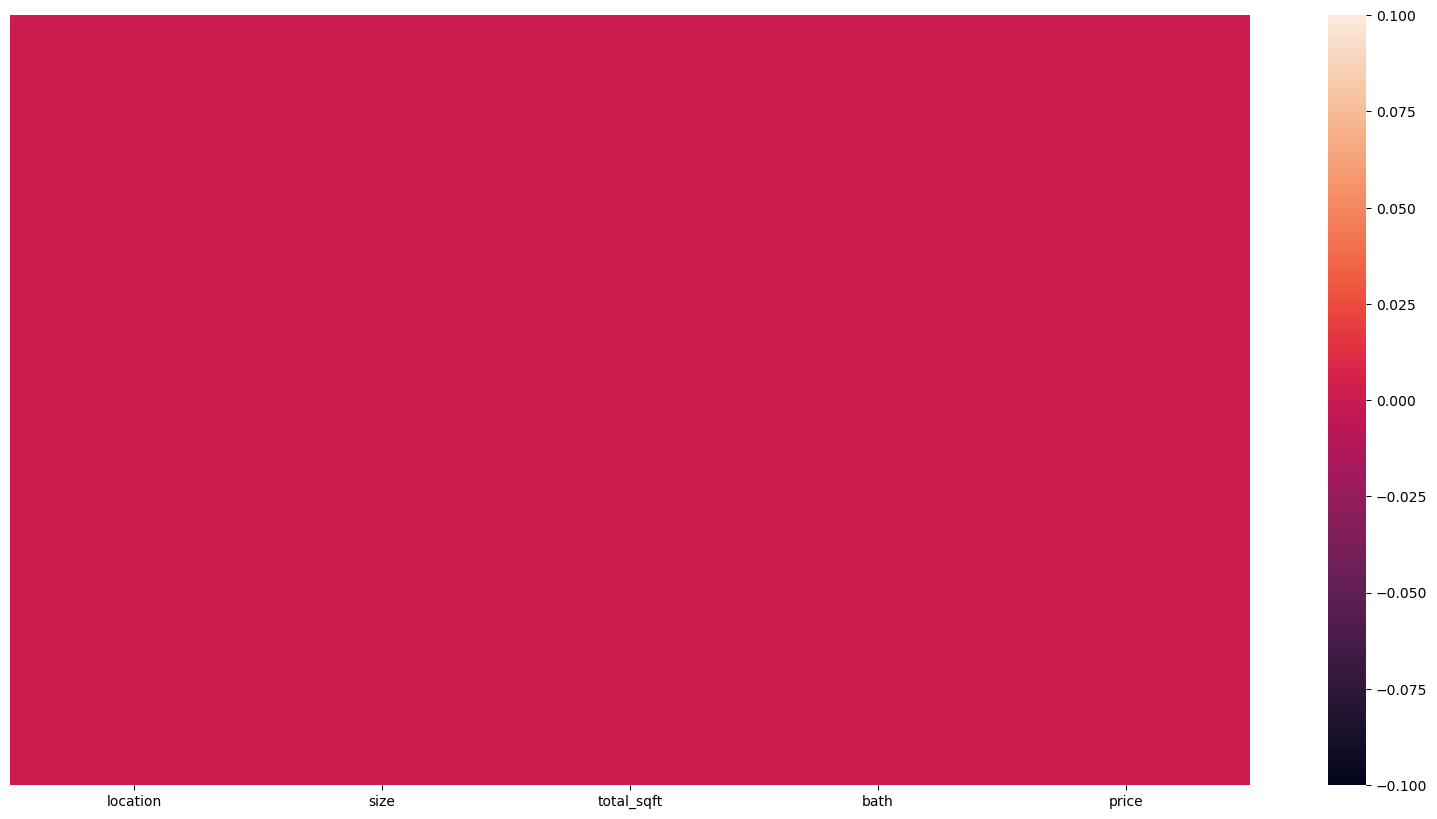

In [21]:
sns.heatmap(df2.isnull(), yticklabels=False)